# **Importing** **Libraries** 

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

# **Model Attributes**

In [144]:
N=20
M=40
D=7
var_noise_lst = []
var_noise_db = [-20,-15,-10,-5,0]
for i in range(len(var_noise_db)):
  var_noise_lst.append(pow(10,var_noise_db[i]/10))
var_noise_lst  

[0.01, 0.03162277660168379, 0.1, 0.31622776601683794, 1.0]

# **W and $\Phi$ matrix initialization**


*   D random elements of W sampled from standard normal distribution
*   $\Phi$ matrix sampled from standard normal distribution





In [145]:
# Generating N X M design matrix 
phi = np.random.normal(0,1,size=(N,M))

In [146]:
# Generating M X 1 sparse weight vector
W = np.zeros((M,1))
Sample = np.random.choice(M,D,replace=False)
 
for i in Sample : 
  W[i] = np.random.normal(0,1,size=1)

# **Functionalities used in the main algorithm**
*   **Diagnolize($\alpha$)** : return a diagnol matrix with elements of $\alpha$ vector as diagnol elements
*   **NMSE()** : Used as a convergence criteria. Returns true when $i^{th}$ and $(i+1)^{th}$ estimates of W give a NMSE value lower than 0.001.
*   **NMSE_value()** : Returns the NMSE value between 2 input vectors






In [147]:
def Diagnolize(alpha) : 
 
  temp = alpha.reshape(alpha.size)
  return np.diag(temp)

In [148]:
def NMSE(W_new,W_old):
 
  if ((LA.norm(W_new - W_old)/LA.norm(W_old))**2)<=0.001:
    return True
  return False  
 
def NMSE_value(W_est,W):
 
  return (LA.norm(W_est - W)/LA.norm(W))**2

# **Algorithm for maximum posterior estimate of W**
Given specifications : 
*   Assume the initial value of $\alpha_{i}$ to be 100 rather than sampling from Gamma distribution.
*   Assume the value of $\beta$ to be known.
*   NMSE value for each noise variance was averaged over 1000 samples to capture the general trend




In [149]:
NMSE_lst = [] # stores the NMSE value for each noise variance values.

W_mp = [] # stores the maximum posterior estimate of W for each noise variance value

for i in var_noise_lst :
 
  var_noise = i

  noise = np.random.normal(0,pow(var_noise,0.5),size=(N,1)) #sampling noise from zero mean normal distribution
 
  t = np.matmul(phi,W) + noise # Generating observations
 
  NMSE_samples = 1000

  NMSE_sum = 0

  W_temp  = np.zeros((M,1))
  for i in range(NMSE_samples):

    alpha = np.ones((M,1))*100
    #print(beta)
 
    W_estimate = np.zeros((M,1)) 
    W_variance = np.zeros((M,M))
    gamma = np.zeros((M,1))
 
    flag = 0
    j=0 #indexed loop if the convergence fails
    while j<1000:

      A = Diagnolize(alpha)
 
      sigma = np.linalg.inv((np.matmul(phi.T,phi))/(var_noise) + A)

      mean = np.matmul(sigma,np.matmul(phi.T,t))/(var_noise)
 
      #checks the convergence criteria for each cycle of the while loop
      if flag==1: 
        if NMSE(mean,W_estimate): #mean:W_new W_est:W_old
          W_estimate = mean
          W_variance = sigma
          NMSE_sum = NMSE_sum + float(NMSE_value(W_estimate,W))
          W_temp = W_temp + W_estimate
          break
 
      for i in range(M):
        gamma[i] = 1 - alpha[i]*sigma[i][i]
  
      for i in range(M):
        alpha[i] = (gamma[i])/(mean[i]*mean[i])
 
 
      W_estimate = mean
      W_variance = sigma
 
      flag = 1
      j = j+1
 
  NMSE_lst.append(NMSE_sum/NMSE_samples)
  W_mp.append(W_temp/NMSE_samples)

In [150]:
NMSE_lst

[0.0017070022516186372,
 0.009365427961123881,
 0.032290529592295114,
 0.08490801773152047,
 0.5344483273155413]

# **Plot of NMSE v/s noise variance**
Inference :
*   The normalized mean squared error (NMSE) increases monotonically as the noise variance increases. This inference also concurs with our intuitive understanding, as variance increases the error in observations also increases thus making the estimate of W less accurate.



Text(0, 0.5, 'NMSE log scale')

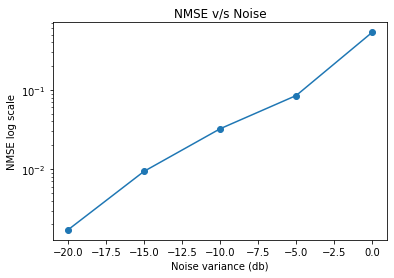

In [151]:
plt.semilogy(var_noise_db,NMSE_lst)
plt.scatter(var_noise_db,NMSE_lst)
plt.title("NMSE v/s Noise")
plt.xlabel("Noise variance (db)")
plt.ylabel("NMSE log scale")

| NMSE value | Noise(db) |
|------------|-----------|
| 0.0017     | -20       |
| 0.0093     | -15       |
| 0.0323     | -10       |
| 0.0849     | -5        |
| 0.5344     | 0         |